<a href="https://colab.research.google.com/github/diialex/portfolio.me/blob/main/T8_AI_Tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ARTIFICIAL INTELLIGENCE THEME 8
## End-to-End AI Example: From Data → Model → Interactive App
---
In this exercise, we’ll walk through a complete miniature AI workflow using the classic Iris flower dataset.
Structured dataset - model training - interactive web application built with Streamlit.

This notebook shows the “From Code to Deployment” principle in action.
You don’t need a large dataset or a deep learning model to understand the logic, even a small dataset can show how AI tools turn data into insights and interactive experiences.

Instructions

1. Run the main code cell to start the Streamlit app.
2. When the notebook prints a public link (e.g. https://uptech-ai.ngrok.app), click it to open the app in your browser.
3. Use the sliders to adjust flower measurements and observe how predictions and confidence levels change.

In [ ]:
!pip install pyngrok --quiet

In [ ]:
from pyngrok import ngrok, conf
conf.get_default().auth_token = "34mw0qsAjRqW92AySl7s9EAxipG_4j5bzHncNLR7uXRVTuP5K"

In [ ]:
!pip install streamlit scikit-learn pyngrok --quiet  # if needed

import subprocess, threading, time, os, sys

# CLEAN UP ANY PRIOR TUNNELS/AGENT
for t in ngrok.get_tunnels():
    try:
        ngrok.disconnect(t.public_url)
        print("Closed:", t.public_url)
    except Exception as e:
        print("Skip/Already closed:", t.public_url, e)
ngrok.kill()
print("All ngrok tunnels/agent closed.")

# AUTH
ngrok.set_auth_token("34mw0qsAjRqW92AySl7s9EAxipG_4j5bzHncNLR7uXRVTuP5K")  # your token

# STREAMLIT APP
code = '''
import streamlit as st
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

st.set_page_config(page_title="Iris Demo: Data → Model → App", layout="wide")
st.title("End-to-End AI: Data → Model → Interactive App")

# Data Loading
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Training model
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)
acc = accuracy_score(y_test, model.predict(X_test))

with st.sidebar:
    st.header("Input features")
    sl = st.slider(feature_names[0], 4.0, 8.0, 5.8, 0.1)
    sw = st.slider(feature_names[1], 2.0, 4.5, 3.0, 0.1)
    pl = st.slider(feature_names[2], 1.0, 7.0, 4.35, 0.1)
    pw = st.slider(feature_names[3], 0.1, 2.5, 1.3, 0.1)

st.caption(f"Model: LogisticRegression | Test accuracy: **{acc:.3f}**")

x_new = np.array([[sl, sw, pl, pw]])
proba = model.predict_proba(x_new)[0]
pred = class_names[np.argmax(proba)]

col1, col2 = st.columns(2)
with col1:
    st.subheader("Prediction")
    st.metric("Predicted species", pred)
with col2:
    st.subheader("Confidence")
    st.bar_chart({name: p for name, p in zip(class_names, proba)})

with st.expander("Dataset preview"):
    df = pd.DataFrame(X, columns=feature_names)
    df["species"] = [class_names[i] for i in y]
    st.dataframe(df)
'''
with open("app.py", "w") as f:
    f.write(code)

# START STREAMLIT SERVER FIRST
port = 8501
proc = subprocess.Popen(
    ["streamlit", "run", "app.py", "--server.port", str(port), "--server.headless", "true"],
    stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True
)

# Give Streamlit a moment to boot
time.sleep(6)

# OPEN EXACTLY ONE NGROK TUNNEL ON YOUR RESERVED DOMAIN
try:
    tunnel = ngrok.connect(addr=port, proto="http", hostname="uptech-ai.ngrok.app")
    print("\nYour Streamlit app is live here:")
    print(tunnel.public_url, "\n")
except Exception as e:
    print("Failed to open ngrok tunnel:", e)
    print("Tip: Runtime → Restart runtime, then run this cell once.")

# OPTIONAL
def stop():
    try:
        if 'tunnel' in globals() and tunnel:
            ngrok.disconnect(tunnel.public_url)
            print("Closed tunnel:", tunnel.public_url)
    except Exception as e:
        print("Tunnel close issue:", e)
    try:
        if 'proc' in globals() and proc:
            proc.terminate()
            print("Stopped Streamlit process.")
    except Exception as e:
        print("Process stop issue:", e)
    ngrok.kill()
    print("ngrok agent killed.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.1 MB/s eta 0:00:00
All ngrok tunnels/agent closed.

Your Streamlit app is live here:
https://uptech-ai.ngrok.app 



Test accuracy: 0.921


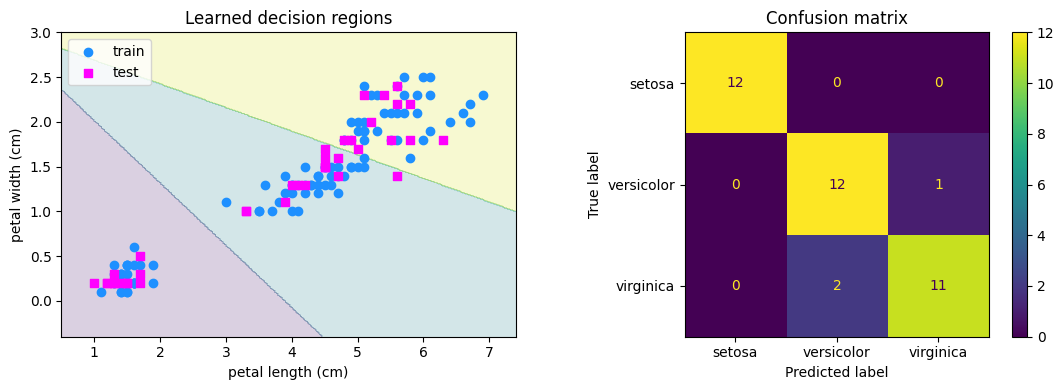

In [ ]:
# AI in one cell: learn → evaluate → visualize (Iris flower classification)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

# 1) Load data (use 2 features so we can plot decision regions)
iris = load_iris()
X = iris.data[:, [2, 3]]   # petal length, petal width
y = iris.target
feature_names = [iris.feature_names[i] for i in [2, 3]]
class_names = iris.target_names

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 3) Pipeline: scale → logistic regression
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

# 4) Accuracy
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.3f}")

# 5) Decision boundary plot
x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# Decision regions
ax[0].contourf(xx, yy, Z, alpha=0.2)   # decision regions

# Plot training and test points
ax[0].scatter(X_train[:,0], X_train[:,1], c='dodgerblue', marker='o', label='train')
ax[0].scatter(X_test[:,0],  X_test[:,1],  c='magenta', marker='s', label='test')
ax[0].set_xlabel(feature_names[0])
ax[0].set_ylabel(feature_names[1])
ax[0].set_title("Learned decision regions")
ax[0].legend(loc='best')

# 6) Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names, ax=ax[1], cmap=None)
ax[1].set_title("Confusion matrix")

plt.tight_layout()
plt.show()
